## UseCase Intro: Employee Attrition
## You are a Data Scientist working at a Jio

- The company is facing a huge problem of employee attrition
- Your task is to help the company find a solution to this problem.

#### Why is attrition a problem?

  - A new employee asks for more compensation
  - Training of new employees
  - Lots of time and resources required for searching a new candidate

#### What can be done to solve the problem ?

1. Identify the employees who may leave in future.
  - Targeted approaches can be undertaken to retain such employees.
  - These might include addressing their problems with the company and so on ...

2. Help identify the key indicators/factors leading to an employee leaving.
  - #### What all reasons can you think of contributing to attrition ?
    - Forcing employees to come to office daily
    - Unhealthy culture etc
  - Identifying these key factors helps in taking better measures to improve employee retention



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

### Now lets import our dataset


In [2]:
#!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### What can we see from this info ?
- The dataset has around 1500 samples
- It contains information about :

    1. Employee demographics\
     Eg: Age, Gender, Marital Status

    2. Employee work-life\
     Eg: Working hours, job satisfaction etc

#### How can we use this information for our problem ?

To understand this lets analyze the features


### EDA

First lets try to find their ditsributions

#### How can we do that ?
- Plotting their histograms
- Recall why we do that ?

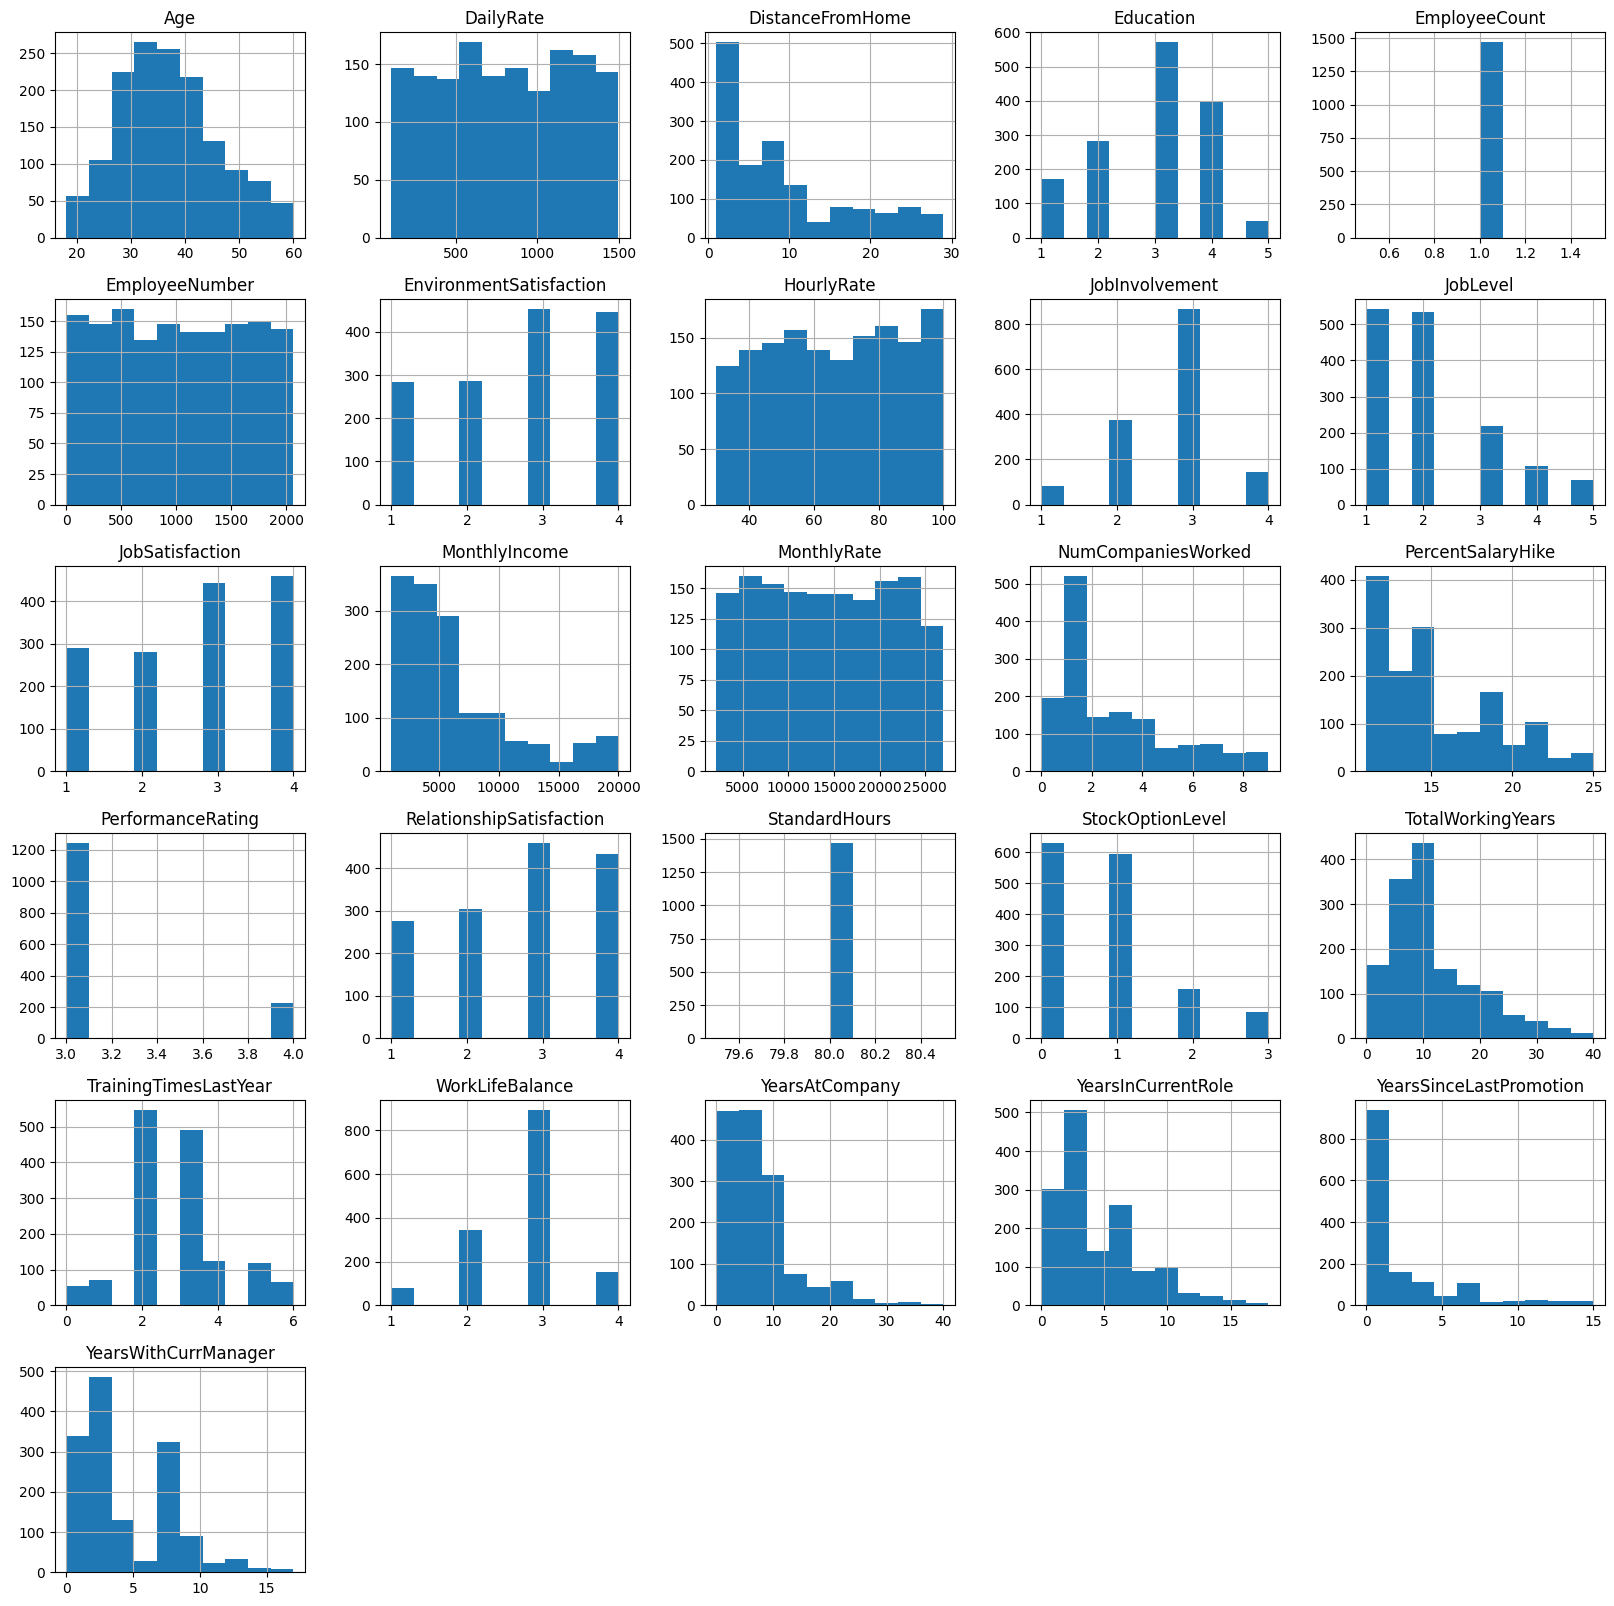

In [5]:
df.hist(figsize = (20,20))
plt.show()

#### What can we observe from these plots ?

1. Many histograms are tail-heavy;

  - Lot of attributes are right-skewed\
 (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany)

  - Data transformation methods **may be** required for standardisation
    - Recall why standardisation is preferred ?

2. Some features seem to have normal distributions

  - Eg: Age:
    - Slightly right-skewed normal distribution
    - Bulk of the staff between 25 and 45 years old

3. Some features are constant

  - Eg: EmployeeCount and StandardHours are constant values for all employees.

  - They're likely to be redundant features.

  - #### How can these features contribute to our problem ?
    - Constant features are not in any way useful for predictions
    - So we can drop these features from the dataset

4. Some features seem to be uniformly distributed.

  - Eg: EmployeeNumber

  - **Uniformly distributed and constant features won't contribute** to our analysis. Why?
    - Each value is equally likely to occur

  - #### So what should we do ?
    - We can drop these features from our dataset

5. Some features are categorical i.e **binomially/multinomially distributed**

  - Eg: WorkLifeBalance, StockOptionLevel etc

  - #### Can we use these features directly in our problem ?
    - No. They willl first have to be encoded

  - #### Recall which encoding has to be used for which features

    - Binary Encoding (0/1) : Features with only 2 unique values

    - Label Encoding (0, 1, 2, 3 ....) :  More than 2 unique values having a particular order

  - OneHot Encoding ([0 0 0 1], ...) : More than 2 unique values having no order

  - Target encoding ([0.1, 0.33, .....)] : Features with a lot of unique vals having no order


7. We can also see from these features that their ranges vary a lot

  - Recall why different feature scales can be a problem

  - We will deal with this problem later

First, lets remove the features that won't contribute to our analysis


In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

Now lets encode our categorical features

#### Which encoding technique should we use ?

  - It depends upon:
    - Number of unique values a feature has
    - If there is a sequence between the feature vals

Lets first check how many unique values each feature has


In [7]:
def unique_vals(col):

  if col.dtype == "object":

    print(f'{col.name}: {col.nunique()}')

df.apply(lambda col: unique_vals(col))

Attrition: 2
BusinessTravel: 3
Department: 3
EducationField: 6
Gender: 2
JobRole: 9
MaritalStatus: 3
OverTime: 2


Age                         None
Attrition                   None
BusinessTravel              None
DailyRate                   None
Department                  None
DistanceFromHome            None
Education                   None
EducationField              None
EnvironmentSatisfaction     None
Gender                      None
HourlyRate                  None
JobInvolvement              None
JobLevel                    None
JobRole                     None
JobSatisfaction             None
MaritalStatus               None
MonthlyIncome               None
MonthlyRate                 None
NumCompaniesWorked          None
OverTime                    None
PercentSalaryHike           None
PerformanceRating           None
RelationshipSatisfaction    None
StockOptionLevel            None
TotalWorkingYears           None
TrainingTimesLastYear       None
WorkLifeBalance             None
YearsAtCompany              None
YearsInCurrentRole          None
YearsSinceLastPromotion     None
YearsWithC

#### On basis of this info, which encoding technique should we use ?

 - We will use binary encoding for features with 2 or less unique val.
 - For features < 6 unique vals we will use OneHot encoding
 - Rest of the categorical features will be Target encoded


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

def label_encode(ser):

    if ser.dtype=="object" and ser.nunique() <= 2:
      print(ser.name)

      le.fit(ser)
      ser = le.transform(ser)

    return ser

df = df.apply(lambda col: label_encode(col))

Attrition
Gender
OverTime


In [9]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, columns = ["BusinessTravel", "Department", "MaritalStatus"], drop_first = True)

In [10]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,Life Sciences,2,0,94,3,...,6,4,0,5,False,True,False,True,False,True
1,49,0,279,8,1,Life Sciences,3,1,61,2,...,10,7,1,7,True,False,True,False,True,False
2,37,1,1373,2,2,Other,4,1,92,2,...,0,0,0,0,False,True,True,False,False,True
3,33,0,1392,3,4,Life Sciences,4,0,56,3,...,8,7,3,0,True,False,True,False,True,False
4,27,0,591,2,1,Medical,1,1,40,3,...,2,2,2,2,False,True,True,False,True,False


#### Lets analyse the target feature now

In [11]:
target = df['Attrition'].copy()
df = df.drop(["Attrition"], axis = 1)
type(target)

pandas.core.series.Series

In [12]:
target.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

#### What can we infer from this info ?
  - The dataset is extremely imbalanced
  - Recall how we deal with imbalanced data

For this dataset we will use SMOTE oversampling technique to balance the data

But SMOTE is applied only to training set

So we need to split the data first

#### In what sets should we split it ?

  - Train/test set

  - #### Why not create a validation set ?
    - We already have less amount of data
    - And we want to train the model with max possible data
    - So we will use K-Fold cross validation instead

#### What ratios should we use for splitting ?
  - 80%/20% for train/test looks enough

Lets split the dataset now

In [13]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=7, stratify=target)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 33)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 33)
Number transactions y_test dataset:  (368,)


In [14]:
len(X_train.columns)

33

Now we will first perform target encoding

In [15]:
!pip install category_encoders

In [16]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['EducationField', 'JobRole'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

### Upsampling using SMOTE

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 924, 1: 924})


In [18]:
X_sm.shape

(1848, 33)

In [19]:
X_sm

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233869,1,0,99,3,2,...,5,4,0,1,False,True,False,True,False,True
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,2,2,2,False,True,True,False,False,True
2,43,422,1,3,0.151584,4,0,33,3,2,...,5,2,2,2,True,False,True,False,True,False
3,42,188,29,3,0.127479,2,1,56,1,2,...,1,0,0,0,False,True,True,False,False,True
4,35,992,1,3,0.127479,4,1,68,2,1,...,3,0,1,2,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,39,1055,4,2,0.162572,1,0,89,3,2,...,6,4,0,5,True,True,False,True,True,True
1844,31,748,24,3,0.230132,1,1,64,2,2,...,9,6,0,7,True,True,True,True,True,True
1845,30,627,17,3,0.168492,1,1,55,2,1,...,2,2,2,0,False,True,True,False,False,True
1846,30,562,24,1,0.146767,3,0,49,2,2,...,9,6,2,8,False,True,True,True,True,False


### Preprocessed data

In [20]:
# !gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
# !gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
# !gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
# !gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

In [21]:
# import pickle
# # Load data (deserialize)
# with open('preprocessed_X_sm.pickle', 'rb') as handle:
#     X_sm = pickle.load(handle)

# with open('X_test.pickle', 'rb') as handle:
#     X_test = pickle.load(handle)

# with open('y_sm.pickle', 'rb') as handle:
#     y_sm = pickle.load(handle)

# with open('y_test.pickle', 'rb') as handle:
#     y_test = pickle.load(handle)

In [22]:
import pickle

# Save both X_sm and y_sm into a single pickle file
with open("smote_resampled.pkl", "wb") as f:
    pickle.dump((X_sm, y_sm), f)